# Set 3 - Figure 5

## Importing Libraries

In [1]:
# Data Management
import numpy as np
import pandas as pd
import scipy as sp

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix


## Epi1

### Cleaning Metadata 

#### Curating Metadata

In [2]:
f1_ec1 = pd.read_csv('files/epi1/PDS000140119.22.tsv', sep = '\t')
f2_ec1 = pd.read_csv('files/epi1/12838_metadata_biosample.csv')
f3_ec1 = f2_ec1[['sra_id', 'biosample_id']]
f3_ec1 = f3_ec1.rename(columns = {'biosample_id':'BioSample',
                          'sra_id':'id'})

d1_ec1 = pd.merge(f1_ec1, f3_ec1, how = 'inner', on = 'BioSample')
d2_ec1 = d1_ec1[['id', 'Location', 'Isolation source']]

da2_ec1 = d2_ec1[['id', 'Location']]
da2_ec1 = da2_ec1.set_index('id')
da2_ec1 = da2_ec1['Location'].str.split(':', expand = True).add_prefix('name_')
da2_ec1 = da2_ec1.rename(columns = {'name_0':'Country'})
da2_ec1 = da2_ec1.drop('name_1', axis = 1)

d3_ec1 = pd.merge(d2_ec1, da2_ec1, how = 'inner', on = 'id')

def replace_country_ec1(x):
    if x == 'USA':                     # 7260
        return 'United States'
    elif x == 'United Kingdom':        # 2057
        return 'United Kingdom'
    else:
        return 'Others'
    
d3_ec1['Country'] = d3_ec1['Country'].apply(replace_country_ec1) 
d3_ec1['source'] = d3_ec1['Isolation source'].str.lower() 

def replace_host_ec1(x):
    if x == 'swine':
        return 'Swine'
    elif x == 'sus scrofa':
        return 'Swine'
    elif x == 'sus domesticus':
        return 'Swine'
    elif x == 'pork':
        return 'Swine'
    elif x == 'porcine':
        return 'Swine'
    elif x == 'pig':
        return 'Swine'
    elif x == 'hogs':
        return 'Swine'
    elif x == 'pig at slaughter':
        return 'Swine'
    elif x == 'animal-swine-market swine':
        return 'Swine'
    elif x == 'pork chop':
        return 'Swine'
    elif x == 'intestine (sus scrofa)':
        return 'Swine'
    elif x == 'animal-swine-sow':
        return 'Swine'
    elif x == 'feces (sus scrofa)':
        return 'Swine'
    elif x == 'product-raw-ground, comminuted or otherwise nonintact-pork':
        return 'Swine'
    elif x == 'product-raw-intact-pork':
        return 'Swine'
    elif x == 'raw intact pork':
        return 'Swine'
    elif x == 'pooled tissue (sus scrofa domesticus)':
        return 'Swine'
    elif x == 'porcine tissue pool':
        return 'Swine'
    elif x == 'porcine liver':
        return 'Swine'
    elif x == 'intestine (sus domesticus)':
        return 'Swine'
    elif x == 'sus scrofa domesticus, culture plate':
        return 'Swine'
    elif x == 'pooled ileum (sus scrofa domesticus)':
        return 'Swine'
    elif x == 'intestine (sus scrofa domesticus)':
        return 'Swine'
    elif x == 'small intestine (sus scrofa domesticus)':
        return 'Swine'
    elif x == 'ileum (sus scrofa domesticus)':
        return 'Swine'
    elif x == 'colon (sus scrofa domesticus)':
        return 'Swine'
    elif x == 'swine, livestock, pig':
        return 'Swine'
    elif x == 'animal-swine-market swine (cecal)':
        return 'Swine'
    elif x == 'lung (sus scrofa domesticus)':
        return 'Swine'
    elif x == 'colon(sus scrofa domesticus)':
        return 'Swine'
    elif x == 'pig meat':
        return 'Swine'
    elif x == 'swine bacterial strain':
        return 'Swine'
    elif x == 'ground pork':
        return 'Swine'
    elif x == 'feces (sus scrofa domesticus)':
        return 'Swine'
    elif x == 'animal-swine-sow (cecal)':
        return 'Swine'
    elif x == 'spleen (sus scrofa domesticus)':
        return 'Swine'
    elif x == 'liver (sus scrofa domesticus)':
        return 'Swine'
    elif x == 'pork chops':
        return 'Swine'
    elif x == 'colon (sus scrofa)':
        return 'Swine'
    elif x == 'roasted pig':
        return 'Swine'
    elif x == 'animal-swine-roaster swine':
        return 'Swine'
    elif x == 'tissue (sus scrofa)':
        return 'Swine'
    elif x == 'feces swine':
        return 'Swine'
    elif x == 'pig intestine (sus scrofa domesticus)':
        return 'Swine'
    elif x == 'pig spleen (sus scrofa domesticus)':
        return 'Swine'
    elif x == 'pig colon (sus scrofa domesticus)':
        return 'Swine'
    elif x == 'pulled pork':
        return 'Swine'
    elif x == 'slaughterhouse pig':
        return 'Swine'
    elif x == 'tissue pool porcine':
        return 'Swine'
    elif x == 'porcine lung':
        return 'Swine'
    elif x == 'porcine intestine (sus scrofa domesticus)':
        return 'Swine'
    elif x == 'porcine lung (sus scrofa domesticus)':
        return 'Swine'
    elif x == 'swine feces':
        return 'Swine'
    elif x == 'boneless pork':
        return 'Swine'
    elif x == 'porcine pooled tissue':
        return 'Swine'
    elif x == 'lymph (sus scrofa)':
        return 'Swine'
    elif x == 'boiled pork with mustard greens':
        return 'Swine'
    elif x == 'raw liver from pork':
        return 'Swine'
    elif x == 'feces porcine':
        return 'Swine'
    elif x == 'porcine colon':
        return 'Swine'
    elif x == 'liver porcine':
        return 'Swine'
    elif x == 'porcine intestine':
        return 'Swine'
    elif x == 'porcine colon (sus scrofa domesticus)':
        return 'Swine'
    elif x == 'raw ground comminuted nonintact pork':
        return 'Swine'
    elif x == 'swine carcass':
        return 'Swine'
    elif x == 'porcine mesenteric lymph node (sus scrofa domesticus)':
        return 'Swine'
    elif x == 'porcine liver (sus scrofa domesticus)':
        return 'Swine'
    elif x == 'pork meat':
        return 'Swine'
    elif x == 'porcine fecal swab (sus scrofa domesticus)':
        return 'Swine'
    elif x == 'porcine peritoneal swab (sus scrofa domesticus)':
        return 'Swine'
    elif x == 'porcine intesinte pooled (sus scrofa domesticus)':
        return 'Swine'
    elif x == 'porcine intestinal swab (sus scrofa domesticus)':
        return 'Swine'
    elif x == 'porcine feces':
        return 'Swine'
    elif x == 'raw pork':
        return 'Swine'
    elif x == 'pork sausage':
        return 'Swine'
    elif x == 'porcine fecal swab':
        return 'Swine'
    elif x == 'swine colon':
        return 'Swine'
    elif x == 'porcine pool intestines':
        return 'Swine'
    elif x == 'intestine (porcine)':
        return 'Swine'
    elif x == 'porcine feces (sus scrofa domesticus)':
        return 'Swine'
    elif x == 'porcine lymph node (sus scrofa domesticus)':
        return 'Swine'
    elif x == 'pork liver':
        return 'Swine'
    elif x == 'pork kidney':
        return 'Swine'
    elif x == 'pork intestine':
        return 'Swine'
    elif x == 'pork fat':
        return 'Swine'
    elif x == 'feces (sus domesticus)':
        return 'Swine'
    elif x == 'porcine pleural (sus scrofa domesticus)':
        return 'Swine'
    elif x == 'feces (sus scrofa domesticus )':
        return 'Swine'
    elif x == 'pork & cabbage dumplings':
        return 'Swine'
    elif x == 'porcine oral fluid (sus scrofa domesticus)':
        return 'Swine'
    elif x == 'rectal swab (sus scrofa domesticus)':
        return 'Swine'
    elif x == 'caecum (sus scrofa domesticus)':
        return 'Swine'
    elif x == 'tissue pool (sus scrofa domesticus)':
        return 'Swine'
    elif x == 'jejunum porcine':
        return 'Swine'
    elif x == 'mesenteric nodes (sus scrofa domesticus)':
        return 'Swine'
    elif x == 'caecum content (sus scrofa domesticus)':
        return 'Swine'
    elif x == 'pig feces':
        return 'Swine'
    elif x == 'farmed pig':
        return 'Swine'
    elif x == 'swine, food, pork':
        return 'Swine'
    elif x == 'rectum (sus scrofa domesticus)':
        return 'Swine'
    elif x == 'spleen porcine':
        return 'Swine'
    elif x == 'stomach porcine':
        return 'Swine'
    elif x == 'pig mechanically separated meat':
        return 'Swine'
    elif x == 'intestine(sus scrofa domesticus)':
        return 'Swine'
    elif x == 'rectal swab(sus scrofa domesticus)':
        return 'Swine'
    elif x == 'lung(sus scrofa domesticus)':
        return 'Swine'
    elif x == 'liver(sus scrofa domesticus)':
        return 'Swine'
    elif x == 'pork carcasses':
        return 'Swine'
    
    elif x == 'human':
        return 'Human'
    elif x == 'human bacterial strain':
        return 'Human'
    elif x == 'human, blood culture':
        return 'Human'
    elif x == 'human, faeces':
        return 'Human'
    elif x == 'human, other':
        return 'Human'
    elif x == 'human, stool':
        return 'Human'
    elif x == 'human, urine':
        return 'Human'
    elif x == 'stool':
        return 'Human'
    elif x == 'clinical sample':
        return 'Human'
    elif x == 'blood':
        return 'Human'
    
    elif x == 'turkey':
        return 'Poultry'
    elif x == 'chicken':
        return 'Poultry'
    elif x == 'comminuted turkey':
        return 'Poultry'
    elif x == 'hen bacterial strain':
        return 'Poultry'
    elif x == 'chicken bacterial strain':
        return 'Poultry'
    elif x == 'feces (gallus gallus domesticus)':
        return 'Poultry'
    elif x == 'animal-turkey-young turkey':
        return 'Poultry'
    elif x == 'poultry':
        return 'Poultry'
    elif x == 'raw intact chicken':
        return 'Poultry'
    elif x == 'ground turkey':
        return 'Poultry'
    elif x == 'nrte (not-ready-to-eat) comminuted poultry exploratory sampling - turkeys':
        return 'Poultry'
    elif x == 'animal-turkey-young turkey (cecal)':
        return 'Poultry'
    elif x == 'ground chicken':
        return 'Poultry'
    elif x == 'animal-turkey-turkey carcass sponge':
        return 'Poultry'
    elif x == 'chicken - young chicken carcass rinse (pre-evisceration)':
        return 'Poultry'
    elif x == 'turkey fluff':
        return 'Poultry'
    elif x == 'turkey carcass sponge':
        return 'Poultry'
    elif x == 'ground component turkey':
        return 'Poultry'
    elif x == 'ground component chicken':
        return 'Poultry'
    elif x == 'comminuted poultry turkey':
        return 'Poultry'
    elif x == 'turkey intestine (meleagris gallopavo)':
        return 'Poultry'
    elif x == 'chicken caecum pre-harvest poultry':
        return 'Poultry'
    elif x == 'chicken carcass':
        return 'Poultry'
    elif x == 'comminuted chicken':
        return 'Poultry'
    elif x == 'animal-chicken-young chicken':
        return 'Poultry'
    elif x == 'chicken meat':
        return 'Poultry'
    elif x == 'poultry meat':
        return 'Poultry'
    elif x == 'finished ground turkey':
        return 'Poultry'
    elif x == 'retail ground turkey':
        return 'Poultry'
    elif x == 'chicken breasts':
        return 'Poultry'
    elif x == 'turkey intestine':
        return 'Poultry'
    elif x == 'poultry manure':
        return 'Poultry'
    elif x == 'chicken breast':
        return 'Poultry'
    elif x == 'chicken whole - cut in lab':
        return 'Poultry'
    elif x == 'turkey fluff (meleagris gallopavo)':
        return 'Poultry'
    elif x == 'chicken whole-cut in lab':
        return 'Poultry'
    elif x == 'turkey faeces':
        return 'Poultry'
    
    elif x == 'product-raw-intact-beef':
        return 'Bovine'
    elif x == 'animal-cattle-beef cow':
        return 'Bovine'
    elif x == 'animal-cattle-dairy cow':
        return 'Bovine'
    elif x == 'animal-cattle-dairy cow (cecal)':
        return 'Bovine'
    elif x == 'animal-calf-bob veal (cecal)':
        return 'Bovine'
    elif x == 'animal-cattle-steer (cecal)':
        return 'Bovine'
    elif x == 'intestine (bos taurus)':
        return 'Bovine'
    elif x == 'feces (bos taurus)':
        return 'Bovine'
    elif x == 'cattle':
        return 'Bovine'
    elif x == 'bovine bacterial strain':
        return 'Bovine'
    elif x == 'buffalo bacterial strain':
        return 'Bovine'
    elif x == 'calf bacterial strain':
        return 'Bovine'
    elif x == 'beef':
        return 'Bovine'
    elif x == 'comminuted beef':
        return 'Bovine'
    elif x == 'tissue pool (bos taurus)':
        return 'Bovine'
    elif x == 'calf feces':
        return 'Bovine'
    elif x == 'jersey calf':
        return 'Bovine'
    elif x == 'calf lymph node':
        return 'Bovine'
    elif x == 'calf small intestine':
        return 'Bovine'
    elif x == 'animal-calf-bob veal':
        return 'Bovine'
    elif x == 'rte product-beef corndog':
        return 'Bovine'
    elif x == 'bovine brain (bos taurus)':
        return 'Bovine'
    elif x == 'animal-cattle-steer':
        return 'Bovine'
    elif x == 'pooled tissue (bos taurus)':
        return 'Bovine'
    elif x == 'pooled tissue (bos taurus)':
        return 'Bovine'
    elif x == 'boneless beef':
        return 'Bovine'
    elif x == 'raw intact beef':
        return 'Bovine'
    elif x == 'bovine fecal swab (bos taurus)':
        return 'Bovine'
    elif x == 'bovine lung (bos taurus)':
        return 'Bovine'
    elif x == 'bovine lymph node (bos taurus)':
        return 'Bovine'
    elif x == 'bovine intestine':
        return 'Bovine'
    elif x == 'biological fluid or and tissue bovine':
        return 'Bovine'
    elif x == 'intestines (bovine)':
        return 'Bovine'
    elif x == 'feces bovine':
        return 'Bovine'
    elif x == 'bovine mesenteric lymph node':
        return 'Bovine'
    elif x == 'ground beef':
        return 'Bovine'
    elif x == 'bovine':
        return 'Bovine'
    elif x == 'bovine manure':
        return 'Bovine'
    elif x == 'liver (bos taurus)':
        return 'Bovine'
    elif x == 'food [ground beef]':
        return 'Bovine'

    else:
        return 'Others'
    
d3_ec1['Source'] = d3_ec1['source'].apply(replace_host_ec1)

md_ec1 = d3_ec1[['id', 'Country', 'Source']]

## Read files 
st_ec1 = pd.read_csv('files/epi1/mlst_output.csv')        # 12230
cgmlst_ec1 = pd.read_csv('files/epi1/sistr_output.csv')   # 12230

## Clean up ST data
st_ec1 = st_ec1.rename(columns = {'FILE':'id'})
st1_ec1 = st_ec1[['id', 'ST']]

def replace_st_ec1(x):
    if x == '34':          # 11273
        return 'ST34'
    else:
        return 'Others'
    
st1_ec1['ST'] = st1_ec1['ST'].apply(replace_st_ec1)

## Clean up cgMLST data
cgmlst_ec1 = cgmlst_ec1[['cgmlst_ST', 'genome', 'serovar_antigen']]
cgmlst_ec1 = cgmlst_ec1.rename(columns = {'cgmlst_ST':'cgMLST',
                                  'genome':'id',
                                  'serovar_antigen':'serovar'})
cgmlst_ec1 = cgmlst_ec1[['id', 'cgMLST', 'serovar']]

def replace_serovar_ec1(x):
    if x == 'I 1,4,[5],12:i:-':
        return 'I 1,4,[5],12:i:-'
    else:
        return 'Others'
    
cgmlst_ec1['Serovar'] = cgmlst_ec1['serovar'].apply(replace_serovar_ec1)
cgmlst_ec1 = cgmlst_ec1.drop(['serovar', 'cgMLST'], axis = 1)

md1_ec1 = pd.merge(st1_ec1, cgmlst_ec1, how = 'inner', on = 'id')
md1_ec1 = md1_ec1[['id', 'Serovar', 'ST']]

md2_ec1 = pd.merge(md1_ec1, md_ec1, how = 'inner', on =  'id')

## Apply filters (before filters 11656, after 643)

## Keep only ST34 (before 11656, after 10736)
md2_ec1 = md2_ec1.loc[md2_ec1['ST'] == 'ST34']

## Drop ST34 if not monophasic (before 10736, after 10721)
md2_ec1 = md2_ec1.loc[~(md2_ec1['Serovar'] == 'Others')]

## Keep only USA (before 10721, after 6428)
md2_ec1 = md2_ec1.loc[md2_ec1['Country'] == 'United States']

## Keep only Swine (before 6428, after 643)
md2_ec1 = md2_ec1.loc[md2_ec1['Source'] == 'Swine']

C:\Users\steph\AppData\Local\Temp\ipykernel_21136\3938380745.py:445: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  st1_ec1['ST'] = st1_ec1['ST'].apply(replace_st_ec1)


#### Curating Rtab File

In [3]:
rtab1_ec1 = pd.read_csv('files/epi1/gene_presence_absence.Rtab', sep = '\t')
rtab1_ec1 = rtab1_ec1.set_index('Gene')
rtab1_ec1 = rtab1_ec1.transpose()

rtab2_ec1 = rtab1_ec1.reset_index()
rtab2_ec1 = rtab2_ec1.rename(columns = {'index':'id'})

## Extract unique ids for Rtab curation
unique_id_ec1 = md2_ec1['id']

rtab_ec1 = pd.merge(unique_id_ec1, rtab2_ec1, how = 'inner', on =  'id')
rtab_ec1 = rtab_ec1.set_index('id')

#### Final Metadata

In [4]:
## ignore all hypothetical genes (genes that start with group_)
j1_ec1 = rtab_ec1.loc[:,~rtab_ec1.columns.str.startswith('group_')]
j2_ec1 = j1_ec1.sum()

## Find shell genes (15 - 95%)
j3_ec1 = (j2_ec1/j1_ec1.shape[0]) * 100
j3_ec1 = j3_ec1.rename('prop')
j3_ec1 = j3_ec1.reset_index()

sg_ec1 = j3_ec1.loc[(j3_ec1['prop'] >= 15) & (j3_ec1['prop'] < 95)]
sg_ec1 = sg_ec1.rename(columns = {'index':'Gene'})
sg_ec1 = sg_ec1.set_index('Gene')

j4_ec1 = j1_ec1.transpose()
j4_ec1 = j4_ec1.reset_index()
j4_ec1 = j4_ec1.rename(columns = {'index':'Gene'})
j5_ec1 = pd.merge(j4_ec1, sg_ec1, how = 'inner', on = 'Gene')
j5_ec1 = j5_ec1.drop('prop', axis = 1)
j5_ec1 = j5_ec1.set_index('Gene')
j5_ec1 = j5_ec1.transpose()
j5_ec1 = j5_ec1.reset_index()
j5_ec1 = j5_ec1.rename(columns = {'index':'id'})

coln_ec1 = j5_ec1.columns
first_ec1 = coln_ec1[1] # ybfF
last_ec1 = coln_ec1[-1] # ccmH

## Filter out genes with counts higher than 1
j6_ec1 = pd.melt(j5_ec1, id_vars = ['id'], value_vars = list(coln_ec1[1:-1]))
j6_ec1 = j6_ec1.loc[j6_ec1['value'] <= 1]

## Spread the data
j7_ec1 = j6_ec1.pivot(index = ['id'], columns = ['Gene'])
j7_ec1 = j7_ec1.droplevel(0, axis = 1)

metadata_epi1 = pd.merge(md2_ec1, j7_ec1, how = 'inner', on = 'id')
# metadata_epi1 # 643 rows

### Plasmids

In [5]:
# Get plasmid data
x1_ec1 = pd.read_csv('files/epi1/abricate_output_plasmidfinder.csv')
x1_ec1 = x1_ec1.rename(columns = {'#FILE':'id', 'GENE':'Gene'})
x2_ec1 = x1_ec1[['id', 'Gene', '%COVERAGE', '%IDENTITY']]

## Threshold stablished (filters keep everything below the first quartile out)
xa2_ec1 = x2_ec1.loc[((x2_ec1['%COVERAGE'] >= 99) & (x2_ec1['%IDENTITY'] >= 88))]
x2_ec1 = xa2_ec1[['id', 'Gene']]

x3_ec1 = x2_ec1.groupby(['id', 'Gene']).size()
x3_ec1 = x3_ec1.reset_index()
x3_ec1 = x3_ec1.rename(columns = {0:'n'})

## Eliminating genes with counts higher than 1
x3_ec1 = x3_ec1.loc[x3_ec1['n'] == 1]

## Spreading data
x4_ec1 = x3_ec1.pivot(index = ['id'], columns = ['Gene'])

## Replacing NaN with 0
x4_ec1 = x4_ec1.fillna(0)
x4_ec1 = x4_ec1.droplevel(0, axis = 1)
x4_ec1 = x4_ec1.reset_index()

md_ec1 = metadata_epi1[['id', 'Source']]
md_ec1['Cluster'] = 'Epi1'

pls_ec1 = pd.merge(md_ec1, x4_ec1, how = 'inner', on = 'id')
plasmids_epi1 = pls_ec1.set_index('id').drop('Source', axis = 1)

C:\Users\steph\AppData\Local\Temp\ipykernel_21136\1274067542.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  md_ec1['Cluster'] = 'Epi1'


### AMR - Resfinder

In [6]:
# Get Resfinder Data
x1_ec1 = pd.read_csv('files/epi1/abricate_output_resfinder.csv')
x1_ec1 = x1_ec1.rename(columns = {'#FILE':'id', 'GENE':'Gene'})
x2_ec1 = x1_ec1[['id', 'Gene', '%COVERAGE', '%IDENTITY']]

## Threshold stablished (filters keep everything below the first quartile out)
xa2_ec1 = x2_ec1.loc[((x2_ec1['%COVERAGE'] == 100) & (x2_ec1['%IDENTITY'] == 100))]
x2_ec1 = xa2_ec1[['id', 'Gene']]

x3_ec1 = x2_ec1.groupby(['id', 'Gene']).size()
x3_ec1 = x3_ec1.reset_index()
x3_ec1 = x3_ec1.rename(columns = {0:'n'})

## Eliminating genes with counts higher than 1
x3_ec1 = x3_ec1.loc[x3_ec1['n'] == 1]

## Spreading data
x4_ec1 = x3_ec1.pivot(index = ['id'], columns = ['Gene'])

## Replacing NaN with 0
x4_ec1 = x4_ec1.fillna(0)
x4_ec1 = x4_ec1.droplevel(0, axis = 1)
x4_ec1 = x4_ec1.reset_index()

md_ec1 = metadata_epi1[['id', 'Source']]
md_ec1['Cluster'] = 'Epi1'

amr_res_ec1 = pd.merge(md_ec1, x4_ec1, how = 'inner', on = 'id')
resfinder_epi1 = amr_res_ec1.set_index('id').drop('Source', axis = 1)

C:\Users\steph\AppData\Local\Temp\ipykernel_21136\2461916345.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  md_ec1['Cluster'] = 'Epi1'


### AMR - Argannot

In [7]:
# Get Argannot Data
x1_ec1 = pd.read_csv('files/epi1/abricate_output_argannot.csv')
x1_ec1 = x1_ec1.rename(columns = {'#FILE':'id', 'GENE':'Gene'})
x2_ec1 = x1_ec1[['id', 'Gene', '%COVERAGE', '%IDENTITY']]

## Threshold stablished (filters keep everything below the first quartile out)
xa2_ec1 = x2_ec1.loc[((x2_ec1['%COVERAGE'] == 100) & (x2_ec1['%IDENTITY'] >= 96))]
x2_ec1 = xa2_ec1[['id', 'Gene']]

x3_ec1 = x2_ec1.groupby(['id', 'Gene']).size()
x3_ec1 = x3_ec1.reset_index()
x3_ec1 = x3_ec1.rename(columns = {0:'n'})

## Eliminating genes with counts higher than 1
x3_ec1 = x3_ec1.loc[x3_ec1['n'] == 1]

## Spreading data
x4_ec1 = x3_ec1.pivot(index = ['id'], columns = ['Gene'])

## Replacing NaN with 0
x4_ec1 = x4_ec1.fillna(0)
x4_ec1 = x4_ec1.droplevel(0, axis = 1)
x4_ec1 = x4_ec1.reset_index()

md_ec1 = metadata_epi1[['id', 'Source']]
md_ec1['Cluster'] = 'Epi1'

amr_arg_ec1 = pd.merge(md_ec1, x4_ec1, how = 'inner', on = 'id')
argannot_epi1 = amr_arg_ec1.set_index('id').drop('Source', axis = 1)

C:\Users\steph\AppData\Local\Temp\ipykernel_21136\1857832423.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  md_ec1['Cluster'] = 'Epi1'


### Major Differenciating Annotated Shell Genes

In [8]:
shell_genes_ec1 = metadata_epi1.drop(['Serovar', 'ST', 'Country', 'Source'], axis = 1).set_index('id')
shell_genes_ec1['Cluster'] = 'Epi1'

## Epi2

### Cleaning Metadata 

#### Curating Metadata

In [9]:
f1_ec2 = pd.read_csv('files/epi2/PDS000142542.2.tsv', sep = '\t')
f2_ec2 = pd.read_csv('files/epi2/sample.ids.sra')
f2_ec2 = f2_ec2.rename(columns = {'Run':'id'})

d1_ec2 = pd.merge(f1_ec2, f2_ec2, how = 'inner', on = 'BioSample')
d2_ec2 = d1_ec2[['id', 'Location', 'Isolation source']]

da2_ec2 = d2_ec2[['id', 'Location']]
da2_ec2 = da2_ec2.set_index('id')
da2_ec2 = da2_ec2['Location'].str.split(':', expand = True).add_prefix('name_')
da2_ec2 = da2_ec2.rename(columns = {'name_0':'Country'})
da2_ec2 = da2_ec2.drop('name_1', axis = 1)

d3_ec2 = pd.merge(d2_ec2, da2_ec2, how = 'inner', on = 'id')

def replace_country_ec2(x):
    if x == 'United Kingdom':
        return 'United Kingdom'
    elif x == 'England, Lancashire':
        return 'United Kingdom'
    elif x == 'England, Nottinghamshire':
        return 'United Kingdom'
    elif x == 'USA':
        return 'United States'
    else:
        return 'Others'
    
d3_ec2['Country'] = d3_ec2['Country'].apply(replace_country_ec2)

d4_ec2 = pd.read_csv('files/epi2/3515_metadata_for_cleaning.csv')
d4_ec2['source'] = d4_ec2['Isolation source'].str.lower() 

def replace_host_ec2(x):
    if x == 'swine':
        return 'Swine'
    elif x == 'sus scrofa':
        return 'Swine'
    elif x == 'sus domesticus':
        return 'Swine'
    elif x == 'pork':
        return 'Swine'
    elif x == 'porcine':
        return 'Swine'
    elif x == 'pig':
        return 'Swine'
    elif x == 'hogs':
        return 'Swine'
    elif x == 'pig at slaughter':
        return 'Swine'
    elif x == 'animal-swine-market swine':
        return 'Swine'
    elif x == 'pork chop':
        return 'Swine'
    elif x == 'intestine (sus scrofa)':
        return 'Swine'
    elif x == 'animal-swine-sow':
        return 'Swine'
    elif x == 'feces (sus scrofa)':
        return 'Swine'
    elif x == 'product-raw-ground, comminuted or otherwise nonintact-pork':
        return 'Swine'
    elif x == 'product-raw-intact-pork':
        return 'Swine'
    elif x == 'raw intact pork':
        return 'Swine'
    elif x == 'pooled tissue (sus scrofa domesticus)':
        return 'Swine'
    elif x == 'porcine tissue pool':
        return 'Swine'
    elif x == 'porcine liver':
        return 'Swine'
    elif x == 'intestine (sus domesticus)':
        return 'Swine'
    elif x == 'sus scrofa domesticus, culture plate':
        return 'Swine'
    elif x == 'pooled ileum (sus scrofa domesticus)':
        return 'Swine'
    elif x == 'intestine (sus scrofa domesticus)':
        return 'Swine'
    elif x == 'small intestine (sus scrofa domesticus)':
        return 'Swine'
    elif x == 'ileum (sus scrofa domesticus)':
        return 'Swine'
    elif x == 'colon (sus scrofa domesticus)':
        return 'Swine'
    elif x == 'swine, livestock, pig':
        return 'Swine'
    elif x == 'animal-swine-market swine (cecal)':
        return 'Swine'
    elif x == 'lung (sus scrofa domesticus)':
        return 'Swine'
    elif x == 'colon(sus scrofa domesticus)':
        return 'Swine'
    elif x == 'pig meat':
        return 'Swine'
    elif x == 'swine bacterial strain':
        return 'Swine'

    elif x == 'turkey':
        return 'Poultry'
    elif x == 'chicken':
        return 'Poultry'
    elif x == 'comminuted turkey':
        return 'Poultry'
    elif x == 'hen bacterial strain':
        return 'Poultry'
    elif x == 'chicken bacterial strain':
        return 'Poultry'
    elif x == 'feces (gallus gallus domesticus)':
        return 'Poultry'
    
    elif x == 'product-raw-intact-beef':
        return 'Bovine'
    elif x == 'animal-cattle-beef cow':
        return 'Bovine'
    elif x == 'animal-cattle-dairy cow':
        return 'Bovine'
    elif x == 'animal-cattle-dairy cow (cecal)':
        return 'Bovine'
    elif x == 'animal-calf-bob veal (cecal)':
        return 'Bovine'
    elif x == 'animal-cattle-steer (cecal)':
        return 'Bovine'
    elif x == 'intestine (bos taurus)':
        return 'Bovine'
    elif x == 'feces (bos taurus)':
        return 'Bovine'
    elif x == 'cattle':
        return 'Bovine'
    elif x == 'bovine bacterial strain':
        return 'Bovine'
    elif x == 'buffalo bacterial strain':
        return 'Bovine'
    elif x == 'calf bacterial strain':
        return 'Bovine'
    elif x == 'beef':
        return 'Bovine'
    elif x == 'comminuted beef':
        return 'Bovine'
    elif x == 'tissue pool (bos taurus)':
        return 'Bovine'
    
    elif x == 'human':
        return 'Human'
    elif x == 'human bacterial strain':
        return 'Human'
    elif x == 'human, blood culture':
        return 'Human'
    elif x == 'human, faeces':
        return 'Human'
    elif x == 'human, other':
        return 'Human'
    elif x == 'human, stool':
        return 'Human'
    elif x == 'human, urine':
        return 'Human'
    elif x == 'stool':
        return 'Human'
    elif x == 'clinical sample':
        return 'Human'
    else:
        return 'Others'
    
d4_ec2['Source'] = d4_ec2['source'].apply(replace_host_ec2)
da4_ec2 = d4_ec2[['id', 'Source']]

d5_ec2 = pd.merge(d3_ec2, da4_ec2, how = 'inner', on = 'id')
md_ec2 = d5_ec2[['id', 'Country', 'Source']]

## Read necessary files
st_ec2 = pd.read_csv('files/epi2/mlst_output.csv')
cgmlst_ec2 = pd.read_csv('files/epi2/sistr_output.csv')

## Clean up ST data
st_ec2 = st_ec2.rename(columns = {'FILE':'id'})
st1_ec2 = st_ec2[['id', 'ST']]

def replace_st_ec2(x):
    if x == '34':        # 3351
        return 'ST34'
    else:
        return 'Others'
    
st1_ec2['ST'] = st1_ec2['ST'].apply(replace_st_ec2)

## Clean up cgMLST data
cgmlst_ec2 = cgmlst_ec2[['genome', 'serovar_antigen']]
cgmlst_ec2 = cgmlst_ec2.reset_index()
cgmlst_ec2 = cgmlst_ec2.rename(columns = {'index':'cgMLST',
                                  'genome':'id',
                                  'serovar_antigen':'serovar'})
cgmlst_ec2 = cgmlst_ec2[['id', 'cgMLST', 'serovar']]

def replace_serovar_ec2(x):
    if x == 'I 1,4,[5],12:i:-':
        return 'I 1,4,[5],12:i:-'
    else:
        return 'Others'
    
cgmlst_ec2['Serovar'] = cgmlst_ec2['serovar'].apply(replace_serovar_ec2)
cgmlst_ec2 = cgmlst_ec2.drop(['serovar', 'cgMLST'], axis = 1)

md1_ec2 = pd.merge(st1_ec2, cgmlst_ec2, how = 'inner', on = 'id')
md1_ec2 = md1_ec2[['id', 'Serovar', 'ST']]

md2_ec2 = pd.merge(md1_ec2, md_ec2, how = 'inner', on =  'id')

## Apply filters (before filters 3391, after 135)

## Keep only ST34 (before 3391, after 3350)
md2_ec2 = md2_ec2.loc[md2_ec2['ST'] == 'ST34']

## Drop ST34 if not monophasic (before 3350, after 2910)
md2_ec2 = md2_ec2.loc[~(md2_ec2['Serovar'] == 'Others')]

## Keep only USA (before 2910, after 623)
md2_ec2 = md2_ec2.loc[md2_ec2['Country'] == 'United States']

## Keep only Swine (before 623, after 135)
md2_ec2 = md2_ec2.loc[md2_ec2['Source'] == 'Swine']

C:\Users\steph\AppData\Local\Temp\ipykernel_21136\4166133566.py:184: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  st1_ec2['ST'] = st1_ec2['ST'].apply(replace_st_ec2)


#### Curating Rtab File

In [10]:
rtab1_ec2 = pd.read_csv('files/epi2/gene_presence_absence.Rtab', sep = '\t')
rtab1_ec2 = rtab1_ec2.set_index('Gene')
rtab1_ec2 = rtab1_ec2.transpose()

rtab2_ec2 = rtab1_ec2.reset_index()
rtab2_ec2 = rtab2_ec2.rename(columns = {'index':'id'})

## Extract unique ids for Rtab curation
unique_id_ec2 = md2_ec2['id']

rtab_ec2 = pd.merge(unique_id_ec2, rtab2_ec2, how = 'inner', on =  'id')
rtab_ec2 = rtab_ec2.set_index('id')

#### Final Metadata

In [11]:
## ignore all hypothetical genes (genes that start with group_)
j1_ec2 = rtab_ec2.loc[:,~rtab_ec2.columns.str.startswith('group_')]
j2_ec2 = j1_ec2.sum()

## Find shell genes (15 - 95%)
j3_ec2 = (j2_ec2/j1_ec2.shape[0]) * 100
j3_ec2 = j3_ec2.rename('prop')
j3_ec2 = j3_ec2.reset_index()

sg_ec2 = j3_ec2.loc[(j3_ec2['prop'] >= 15) & (j3_ec2['prop'] < 95)]
sg_ec2 = sg_ec2.rename(columns = {'index':'Gene'})
sg_ec2 = sg_ec2.set_index('Gene')

j4_ec2 = j1_ec2.transpose()
j4_ec2 = j4_ec2.reset_index()
j4_ec2 = j4_ec2.rename(columns = {'index':'Gene'})
j5_ec2 = pd.merge(j4_ec2, sg_ec2, how = 'inner', on = 'Gene')
j5_ec2 = j5_ec2.drop('prop', axis = 1)
j5_ec2 = j5_ec2.set_index('Gene')
j5_ec2 = j5_ec2.transpose()
j5_ec2 = j5_ec2.reset_index()
j5_ec2 = j5_ec2.rename(columns = {'index':'id'})

coln_ec2 = j5_ec2.columns
first_ec2 = coln_ec2[1] # srlB_2
last_ec2 = coln_ec2[-1] # yfdG_2

## Filter out genes with counts higher than 1
j6_ec2 = pd.melt(j5_ec2, id_vars = ['id'], value_vars = list(coln_ec2[1:-1]))
j6_ec2 = j6_ec2.loc[j6_ec2['value'] <= 1]

## Spread the data
j7_ec2 = j6_ec2.pivot(index = ['id'], columns = ['Gene'])
j7_ec2 = j7_ec2.droplevel(0, axis = 1)


metadata_epi2 = pd.merge(md2_ec2, j7_ec2, how = 'inner', on = 'id')
# metadata_epi2 # 135 rows

### Plasmids

In [12]:
x1_ec2 = pd.read_csv('files/epi2/abricate_output_plasmidfinder.csv')
x1_ec2 = x1_ec2.rename(columns = {'#FILE':'id', 'GENE':'Gene'})
x2_ec2 = x1_ec2[['id', 'Gene', '%COVERAGE', '%IDENTITY']]

## Threshold stablished (filters keep everything below the first quartile out)
xa2_ec2 = x2_ec2.loc[((x2_ec2['%COVERAGE'] >= 99) & (x2_ec2['%IDENTITY'] >= 85))]
x2_ec2 = xa2_ec2[['id', 'Gene']]

x3_ec2 = x2_ec2.groupby(['id', 'Gene']).size()
x3_ec2 = x3_ec2.reset_index()
x3_ec2 = x3_ec2.rename(columns = {0:'n'})

## Eliminating genes with counts higher than 1
x3_ec2 = x3_ec2.loc[x3_ec2['n'] == 1]

## Spreading data
x4_ec2 = x3_ec2.pivot(index = ['id'], columns = ['Gene'])

## Replacing NaN with 0
x4_ec2 = x4_ec2.fillna(0)
x4_ec2 = x4_ec2.droplevel(0, axis = 1)
x4_ec2 = x4_ec2.reset_index()

md_ec2 = metadata_epi2[['id', 'Source']]
md_ec2['Cluster'] = 'Epi2'

pls_ec2 = pd.merge(md_ec2, x4_ec2, how = 'inner', on = 'id')
plasmids_epi2 = pls_ec2.set_index('id').drop('Source', axis = 1)


C:\Users\steph\AppData\Local\Temp\ipykernel_21136\2099159878.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  md_ec2['Cluster'] = 'Epi2'


### AMR - Resfinder

In [13]:
# Get Resfinder Data
x1_ec2 = pd.read_csv('files/epi2/abricate_output_resfinder.csv')
x1_ec2 = x1_ec2.rename(columns = {'#FILE':'id', 'GENE':'Gene'})
x2_ec2 = x1_ec2[['id', 'Gene', '%COVERAGE', '%IDENTITY']]

## Threshold stablished (filters keep everything below the first quartile out)
xa2_ec2 = x2_ec2.loc[((x2_ec2['%COVERAGE'] == 100) & (x2_ec2['%IDENTITY'] == 100))]
x2_ec2 = xa2_ec2[['id', 'Gene']]

x3_ec2 = x2_ec2.groupby(['id', 'Gene']).size()
x3_ec2 = x3_ec2.reset_index()
x3_ec2 = x3_ec2.rename(columns = {0:'n'})

## Eliminating genes with counts higher than 1
x3_ec2 = x3_ec2.loc[x3_ec2['n'] == 1]

## Spreading data
x4_ec2 = x3_ec2.pivot(index = ['id'], columns = ['Gene'])

## Replacing NaN with 0
x4_ec2 = x4_ec2.fillna(0)
x4_ec2 = x4_ec2.droplevel(0, axis = 1)
x4_ec2 = x4_ec2.reset_index()

md_ec2 = metadata_epi2[['id', 'Source']]
md_ec2['Cluster'] = 'Epi2'

amr_res_ec2 = pd.merge(md_ec2, x4_ec2, how = 'inner', on = 'id')
resfinder_epi2 = amr_res_ec2.set_index('id').drop('Source', axis = 1)


C:\Users\steph\AppData\Local\Temp\ipykernel_21136\1830852883.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  md_ec2['Cluster'] = 'Epi2'


### AMR - Argannot

In [14]:
# Get Argannot Data
x1_ec2 = pd.read_csv('files/epi2/abricate_output_argannot.csv')
x1_ec2 = x1_ec2.rename(columns = {'#FILE':'id', 'GENE':'Gene'})
x2_ec2 = x1_ec2[['id', 'Gene', '%COVERAGE', '%IDENTITY']]

## Threshold stablished (filters keep everything below the first quartile out)
xa2_ec2 = x2_ec2.loc[((x2_ec2['%COVERAGE'] == 100) & (x2_ec2['%IDENTITY'] >= 96))]
x2_ec2 = xa2_ec2[['id', 'Gene']]

x3_ec2 = x2_ec2.groupby(['id', 'Gene']).size()
x3_ec2 = x3_ec2.reset_index()
x3_ec2 = x3_ec2.rename(columns = {0:'n'})

## Eliminating genes with counts higher than 1
x3_ec2 = x3_ec2.loc[x3_ec2['n'] == 1]

## Spreading data
x4_ec2 = x3_ec2.pivot(index = ['id'], columns = ['Gene'])

## Replacing NaN with 0
x4_ec2 = x4_ec2.fillna(0)
x4_ec2 = x4_ec2.droplevel(0, axis = 1)
x4_ec2 = x4_ec2.reset_index()

md_ec2 = metadata_epi2[['id', 'Source']]
md_ec2['Cluster'] = 'Epi2'

amr_arg_ec2 = pd.merge(md_ec2, x4_ec2, how = 'inner', on = 'id')
argannot_epi2 = amr_arg_ec2.set_index('id').drop('Source', axis = 1)

C:\Users\steph\AppData\Local\Temp\ipykernel_21136\3832308892.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  md_ec2['Cluster'] = 'Epi2'


### Major Differenciating Annotated Shell Genes

In [15]:
shell_genes_ec2 = metadata_epi2.drop(['Serovar', 'ST', 'Country', 'Source'], axis = 1).set_index('id')
shell_genes_ec2['Cluster'] = 'Epi2'

## Joining Data

In [16]:
plasmids = pd.concat([plasmids_epi1, plasmids_epi2])
plasmids = plasmids.fillna(0)

resfinder = pd.concat([resfinder_epi1, resfinder_epi2])
resfinder = resfinder.fillna(0)

argannot = pd.concat([argannot_epi1, argannot_epi2])
argannot = argannot.fillna(0)

shell_genes = pd.concat([shell_genes_ec1, shell_genes_ec2])
shell_genes = shell_genes.fillna(0)

shell_genes = shell_genes[['Cluster'] + [col for col in shell_genes.columns if col != 'Cluster']]

## Random Forest

### Plasmids

#### 80-20 split

In [17]:
X_plasmids = plasmids.drop('Cluster', axis = 1)
y_plasmids = plasmids['Cluster']

# Split the dataset
X_plasmids_train, X_plasmids_test, y_plasmids_train, y_plasmids_test = train_test_split(X_plasmids, y_plasmids, 
                                                                                        test_size = 0.2, 
                                                                                        random_state = 42)

# Train the Random Forest model
rf_plasmids = RandomForestClassifier(n_estimators = 50, random_state = 42)
rf_plasmids.fit(X_plasmids_train, y_plasmids_train)

# Evaluate the model
accuracy_before_plasmids = rf_plasmids.score(X_plasmids_test, y_plasmids_test)
print(f'Accuracy before feature selection: {accuracy_before_plasmids:.2f}')

# Extract feature importances
importances_plasmids = rf_plasmids.feature_importances_
feature_names_plasmids = X_plasmids.columns
feature_importance_plasmids = pd.DataFrame({'Feature': feature_names_plasmids, 'Importance': importances_plasmids})

# Rank features by importance
feature_importance_plasmids = feature_importance_plasmids.sort_values(by = 'Importance', ascending = False)
# print(feature_importance_df)

# Select top 10 features
top_features_plasmids = feature_importance_plasmids['Feature'][:10].values
X_plasmids_train_selected = X_plasmids_train[top_features_plasmids]
X_plasmids_test_selected = X_plasmids_test[top_features_plasmids]

# Train the Random Forest model with selected features
rf_selected_plasmids = RandomForestClassifier(n_estimators = 50, random_state = 42)
rf_selected_plasmids.fit(X_plasmids_train_selected, y_plasmids_train)

# Evaluate the model
accuracy_after_plasmids = rf_selected_plasmids.score(X_plasmids_test_selected, y_plasmids_test)
print(f'Accuracy after feature selection: {accuracy_after_plasmids:.2f}')

pls_rf_80 = feature_importance_plasmids
pls_rf_80['Split'] = '80-20'

Accuracy before feature selection: 0.82
Accuracy after feature selection: 0.84


#### 70-30 split

In [18]:
# Split the dataset
X_plasmids_train, X_plasmids_test, y_plasmids_train, y_plasmids_test = train_test_split(X_plasmids, y_plasmids, 
                                                                                        test_size = 0.3, 
                                                                                        random_state = 42)

# Train the Random Forest model
rf_plasmids = RandomForestClassifier(n_estimators = 50, random_state = 42)
rf_plasmids.fit(X_plasmids_train, y_plasmids_train)

# Evaluate the model
accuracy_before_plasmids = rf_plasmids.score(X_plasmids_test, y_plasmids_test)
print(f'Accuracy before feature selection: {accuracy_before_plasmids:.2f}')

# Extract feature importances
importances_plasmids = rf_plasmids.feature_importances_
feature_names_plasmids = X_plasmids.columns
feature_importance_plasmids = pd.DataFrame({'Feature': feature_names_plasmids, 'Importance': importances_plasmids})

# Rank features by importance
feature_importance_plasmids = feature_importance_plasmids.sort_values(by = 'Importance', ascending = False)
# print(feature_importance_df)

# Select top 10 features
top_features_plasmids = feature_importance_plasmids['Feature'][:10].values
X_plasmids_train_selected = X_plasmids_train[top_features_plasmids]
X_plasmids_test_selected = X_plasmids_test[top_features_plasmids]

# Train the Random Forest model with selected features
rf_selected_plasmids = RandomForestClassifier(n_estimators = 50, random_state = 42)
rf_selected_plasmids.fit(X_plasmids_train_selected, y_plasmids_train)

# Evaluate the model
accuracy_after_plasmids = rf_selected_plasmids.score(X_plasmids_test_selected, y_plasmids_test)
print(f'Accuracy after feature selection: {accuracy_after_plasmids:.2f}')

pls_rf_70 = feature_importance_plasmids
pls_rf_70['Split'] = '70-30'

Accuracy before feature selection: 0.84
Accuracy after feature selection: 0.85


#### 60-40 split

In [19]:
# Split the dataset
X_plasmids_train, X_plasmids_test, y_plasmids_train, y_plasmids_test = train_test_split(X_plasmids, y_plasmids, 
                                                                                        test_size = 0.4, 
                                                                                        random_state = 42)

# Train the Random Forest model
rf_plasmids = RandomForestClassifier(n_estimators = 50, random_state = 42)
rf_plasmids.fit(X_plasmids_train, y_plasmids_train)

# Evaluate the model
accuracy_before_plasmids = rf_plasmids.score(X_plasmids_test, y_plasmids_test)
print(f'Accuracy before feature selection: {accuracy_before_plasmids:.2f}')

# Extract feature importances
importances_plasmids = rf_plasmids.feature_importances_
feature_names_plasmids = X_plasmids.columns
feature_importance_plasmids = pd.DataFrame({'Feature': feature_names_plasmids, 'Importance': importances_plasmids})

# Rank features by importance
feature_importance_plasmids = feature_importance_plasmids.sort_values(by = 'Importance', ascending = False)
# print(feature_importance_df)

# Select top 10 features
top_features_plasmids = feature_importance_plasmids['Feature'][:10].values
X_plasmids_train_selected = X_plasmids_train[top_features_plasmids]
X_plasmids_test_selected = X_plasmids_test[top_features_plasmids]

# Train the Random Forest model with selected features
rf_selected_plasmids = RandomForestClassifier(n_estimators = 50, random_state = 42)
rf_selected_plasmids.fit(X_plasmids_train_selected, y_plasmids_train)

# Evaluate the model
accuracy_after_plasmids = rf_selected_plasmids.score(X_plasmids_test_selected, y_plasmids_test)
print(f'Accuracy after feature selection: {accuracy_after_plasmids:.2f}')

pls_rf_60 = feature_importance_plasmids
pls_rf_60['Split'] = '60-40'

Accuracy before feature selection: 0.84
Accuracy after feature selection: 0.84


#### Filtering and preparing data

In [20]:
pls_rf1 = pd.concat([pls_rf_60, pls_rf_70, pls_rf_80])
pls_rf = pls_rf1.loc[pls_rf1['Importance'] > 0.01]

### AMR- Resfinder

#### 80-20 split

In [21]:
X_resfinder = resfinder.drop('Cluster', axis = 1)
y_resfinder = resfinder['Cluster']

# Split the dataset
X_resfinder_train, X_resfinder_test, y_resfinder_train, y_resfinder_test = train_test_split(X_resfinder, y_resfinder, 
                                                                                        test_size = 0.2, 
                                                                                        random_state = 42)

# Train the Random Forest model
rf_resfinder = RandomForestClassifier(n_estimators = 50, random_state = 42)
rf_resfinder.fit(X_resfinder_train, y_resfinder_train)

# Evaluate the model
accuracy_before_resfinder = rf_resfinder.score(X_resfinder_test, y_resfinder_test)
print(f'Accuracy before feature selection: {accuracy_before_resfinder:.2f}')

# Extract feature importances
importances_resfinder = rf_resfinder.feature_importances_
feature_names_resfinder = X_resfinder.columns
feature_importance_resfinder = pd.DataFrame({'Feature': feature_names_resfinder, 'Importance': importances_resfinder})

# Rank features by importance
feature_importance_resfinder = feature_importance_resfinder.sort_values(by = 'Importance', ascending = False)
# print(feature_importance_df)

# Select top 10 features
top_features_resfinder = feature_importance_resfinder['Feature'][:10].values
X_resfinder_train_selected = X_resfinder_train[top_features_resfinder]
X_resfinder_test_selected = X_resfinder_test[top_features_resfinder]

# Train the Random Forest model with selected features
rf_selected_resfinder = RandomForestClassifier(n_estimators = 50, random_state = 42)
rf_selected_resfinder.fit(X_resfinder_train_selected, y_resfinder_train)

# Evaluate the model
accuracy_after_resfinder = rf_selected_resfinder.score(X_resfinder_test_selected, y_resfinder_test)
print(f'Accuracy after feature selection: {accuracy_after_resfinder:.2f}')

res_rf_80 = feature_importance_resfinder
res_rf_80['Split'] = '80-20'

Accuracy before feature selection: 0.81
Accuracy after feature selection: 0.81


#### 70-30 split

In [22]:
# Split the dataset
X_resfinder_train, X_resfinder_test, y_resfinder_train, y_resfinder_test = train_test_split(X_resfinder, y_resfinder, 
                                                                                        test_size = 0.3, 
                                                                                        random_state = 42)

# Train the Random Forest model
rf_resfinder = RandomForestClassifier(n_estimators = 50, random_state = 42)
rf_resfinder.fit(X_resfinder_train, y_resfinder_train)

# Evaluate the model
accuracy_before_resfinder = rf_resfinder.score(X_resfinder_test, y_resfinder_test)
print(f'Accuracy before feature selection: {accuracy_before_resfinder:.2f}')

# Extract feature importances
importances_resfinder = rf_resfinder.feature_importances_
feature_names_resfinder = X_resfinder.columns
feature_importance_resfinder = pd.DataFrame({'Feature': feature_names_resfinder, 'Importance': importances_resfinder})

# Rank features by importance
feature_importance_resfinder = feature_importance_resfinder.sort_values(by = 'Importance', ascending = False)
# print(feature_importance_df)

# Select top 10 features
top_features_resfinder = feature_importance_resfinder['Feature'][:10].values
X_resfinder_train_selected = X_resfinder_train[top_features_resfinder]
X_resfinder_test_selected = X_resfinder_test[top_features_resfinder]

# Train the Random Forest model with selected features
rf_selected_resfinder = RandomForestClassifier(n_estimators = 50, random_state = 42)
rf_selected_resfinder.fit(X_resfinder_train_selected, y_resfinder_train)

# Evaluate the model
accuracy_after_resfinder = rf_selected_resfinder.score(X_resfinder_test_selected, y_resfinder_test)
print(f'Accuracy after feature selection: {accuracy_after_resfinder:.2f}')

res_rf_70 = feature_importance_resfinder
res_rf_70['Split'] = '70-30'

Accuracy before feature selection: 0.83
Accuracy after feature selection: 0.84


#### 60-40 split

In [23]:
# Split the dataset
X_resfinder_train, X_resfinder_test, y_resfinder_train, y_resfinder_test = train_test_split(X_resfinder, y_resfinder, 
                                                                                        test_size = 0.4, 
                                                                                        random_state = 42)

# Train the Random Forest model
rf_resfinder = RandomForestClassifier(n_estimators = 50, random_state = 42)
rf_resfinder.fit(X_resfinder_train, y_resfinder_train)

# Evaluate the model
accuracy_before_resfinder = rf_resfinder.score(X_resfinder_test, y_resfinder_test)
print(f'Accuracy before feature selection: {accuracy_before_resfinder:.2f}')

# Extract feature importances
importances_resfinder = rf_resfinder.feature_importances_
feature_names_resfinder = X_resfinder.columns
feature_importance_resfinder = pd.DataFrame({'Feature': feature_names_resfinder, 'Importance': importances_resfinder})

# Rank features by importance
feature_importance_resfinder = feature_importance_resfinder.sort_values(by = 'Importance', ascending = False)
# print(feature_importance_df)

# Select top 10 features
top_features_resfinder = feature_importance_resfinder['Feature'][:10].values
X_resfinder_train_selected = X_resfinder_train[top_features_resfinder]
X_resfinder_test_selected = X_resfinder_test[top_features_resfinder]

# Train the Random Forest model with selected features
rf_selected_resfinder = RandomForestClassifier(n_estimators = 50, random_state = 42)
rf_selected_resfinder.fit(X_resfinder_train_selected, y_resfinder_train)

# Evaluate the model
accuracy_after_resfinder = rf_selected_resfinder.score(X_resfinder_test_selected, y_resfinder_test)
print(f'Accuracy after feature selection: {accuracy_after_resfinder:.2f}')

res_rf_60 = feature_importance_resfinder
res_rf_60['Split'] = '60-40'

Accuracy before feature selection: 0.85
Accuracy after feature selection: 0.85


#### Filtering and preparing data

In [24]:
res_rf1 = pd.concat([res_rf_60, res_rf_70, res_rf_80])
res_rf = res_rf1.loc[res_rf1['Importance'] > 0.01]

### AMR - Argannot

#### 80-20 split

In [25]:
X_argannot = argannot.drop('Cluster', axis = 1)
y_argannot = argannot['Cluster']

# Split the dataset
X_argannot_train, X_argannot_test, y_argannot_train, y_argannot_test = train_test_split(X_argannot, y_argannot, 
                                                                                        test_size = 0.2, 
                                                                                        random_state = 42)

# Train the Random Forest model
rf_argannot = RandomForestClassifier(n_estimators = 50, random_state = 42)
rf_argannot.fit(X_argannot_train, y_argannot_train)

# Evaluate the model
accuracy_before_argannot = rf_argannot.score(X_argannot_test, y_argannot_test)
print(f'Accuracy before feature selection: {accuracy_before_argannot:.2f}')

# Extract feature importances
importances_argannot = rf_argannot.feature_importances_
feature_names_argannot = X_argannot.columns
feature_importance_argannot = pd.DataFrame({'Feature': feature_names_argannot, 'Importance': importances_argannot})

# Rank features by importance
feature_importance_argannot = feature_importance_argannot.sort_values(by = 'Importance', ascending = False)
# print(feature_importance_df)

# Select top 10 features
top_features_argannot = feature_importance_argannot['Feature'][:10].values
X_argannot_train_selected = X_argannot_train[top_features_argannot]
X_argannot_test_selected = X_argannot_test[top_features_argannot]

# Train the Random Forest model with selected features
rf_selected_argannot = RandomForestClassifier(n_estimators = 50, random_state = 42)
rf_selected_argannot.fit(X_argannot_train_selected, y_argannot_train)

# Evaluate the model
accuracy_after_argannot = rf_selected_argannot.score(X_argannot_test_selected, y_argannot_test)
print(f'Accuracy after feature selection: {accuracy_after_argannot:.2f}')

arg_rf_80 = feature_importance_argannot
arg_rf_80['Split'] = '80-20'

Accuracy before feature selection: 0.83
Accuracy after feature selection: 0.81


#### 70-30 split

In [26]:
# Split the dataset
X_argannot_train, X_argannot_test, y_argannot_train, y_argannot_test = train_test_split(X_argannot, y_argannot, 
                                                                                        test_size = 0.3, 
                                                                                        random_state = 42)

# Train the Random Forest model
rf_argannot = RandomForestClassifier(n_estimators = 50, random_state = 42)
rf_argannot.fit(X_argannot_train, y_argannot_train)

# Evaluate the model
accuracy_before_argannot = rf_argannot.score(X_argannot_test, y_argannot_test)
print(f'Accuracy before feature selection: {accuracy_before_argannot:.2f}')

# Extract feature importances
importances_argannot = rf_argannot.feature_importances_
feature_names_argannot = X_argannot.columns
feature_importance_argannot = pd.DataFrame({'Feature': feature_names_argannot, 'Importance': importances_argannot})

# Rank features by importance
feature_importance_argannot = feature_importance_argannot.sort_values(by = 'Importance', ascending = False)
# print(feature_importance_df)

# Select top 10 features
top_features_argannot = feature_importance_argannot['Feature'][:10].values
X_argannot_train_selected = X_argannot_train[top_features_argannot]
X_argannot_test_selected = X_argannot_test[top_features_argannot]

# Train the Random Forest model with selected features
rf_selected_argannot = RandomForestClassifier(n_estimators = 50, random_state = 42)
rf_selected_argannot.fit(X_argannot_train_selected, y_argannot_train)

# Evaluate the model
accuracy_after_argannot = rf_selected_argannot.score(X_argannot_test_selected, y_argannot_test)
print(f'Accuracy after feature selection: {accuracy_after_argannot:.2f}')

arg_rf_70 = feature_importance_argannot
arg_rf_70['Split'] = '70-30'

Accuracy before feature selection: 0.85
Accuracy after feature selection: 0.85


#### 60-40 split

In [27]:
# Split the dataset
X_argannot_train, X_argannot_test, y_argannot_train, y_argannot_test = train_test_split(X_argannot, y_argannot, 
                                                                                        test_size = 0.4, 
                                                                                        random_state = 42)

# Train the Random Forest model
rf_argannot = RandomForestClassifier(n_estimators = 50, random_state = 42)
rf_argannot.fit(X_argannot_train, y_argannot_train)

# Evaluate the model
accuracy_before_argannot = rf_argannot.score(X_argannot_test, y_argannot_test)
print(f'Accuracy before feature selection: {accuracy_before_argannot:.2f}')

# Extract feature importances
importances_argannot = rf_argannot.feature_importances_
feature_names_argannot = X_argannot.columns
feature_importance_argannot = pd.DataFrame({'Feature': feature_names_argannot, 'Importance': importances_argannot})

# Rank features by importance
feature_importance_argannot = feature_importance_argannot.sort_values(by = 'Importance', ascending = False)
# print(feature_importance_df)

# Select top 10 features
top_features_argannot = feature_importance_argannot['Feature'][:10].values
X_argannot_train_selected = X_argannot_train[top_features_argannot]
X_argannot_test_selected = X_argannot_test[top_features_argannot]

# Train the Random Forest model with selected features
rf_selected_argannot = RandomForestClassifier(n_estimators = 50, random_state = 42)
rf_selected_argannot.fit(X_argannot_train_selected, y_argannot_train)

# Evaluate the model
accuracy_after_argannot = rf_selected_argannot.score(X_argannot_test_selected, y_argannot_test)
print(f'Accuracy after feature selection: {accuracy_after_argannot:.2f}')

arg_rf_60 = feature_importance_argannot
arg_rf_60['Split'] = '60-40'

Accuracy before feature selection: 0.86
Accuracy after feature selection: 0.85


#### Filtering and preparing data

In [28]:
arg_rf1 = pd.concat([arg_rf_60, arg_rf_70, arg_rf_80])
arg_rf = arg_rf1.loc[arg_rf1['Importance'] > 0.01]

### Major Differenciating Annotated Shell Genes

#### 80-20 split

In [29]:
X_shell_genes = shell_genes.drop('Cluster', axis = 1)
y_shell_genes = shell_genes['Cluster']

# Split the dataset
X_shell_genes_train, X_shell_genes_test, y_shell_genes_train, y_shell_genes_test = train_test_split(X_shell_genes, y_shell_genes, 
                                                                                        test_size = 0.2, 
                                                                                        random_state = 42)

# Train the Random Forest model
rf_shell_genes = RandomForestClassifier(n_estimators = 50, random_state = 42)
rf_shell_genes.fit(X_shell_genes_train, y_shell_genes_train)

# Evaluate the model
accuracy_before_shell_genes = rf_shell_genes.score(X_shell_genes_test, y_shell_genes_test)
print(f'Accuracy before feature selection: {accuracy_before_shell_genes:.2f}')

# Extract feature importances
importances_shell_genes = rf_shell_genes.feature_importances_
feature_names_shell_genes = X_shell_genes.columns
feature_importance_shell_genes = pd.DataFrame({'Feature': feature_names_shell_genes, 'Importance': importances_shell_genes})

# Rank features by importance
feature_importance_shell_genes = feature_importance_shell_genes.sort_values(by = 'Importance', ascending = False)
# print(feature_importance_df)

# Select top 10 features
top_features_shell_genes = feature_importance_shell_genes['Feature'][:10].values
X_shell_genes_train_selected = X_shell_genes_train[top_features_shell_genes]
X_shell_genes_test_selected = X_shell_genes_test[top_features_shell_genes]

# Train the Random Forest model with selected features
rf_selected_shell_genes = RandomForestClassifier(n_estimators = 50, random_state = 42)
rf_selected_shell_genes.fit(X_shell_genes_train_selected, y_shell_genes_train)

# Evaluate the model
accuracy_after_shell_genes = rf_selected_shell_genes.score(X_shell_genes_test_selected, y_shell_genes_test)
print(f'Accuracy after feature selection: {accuracy_after_shell_genes:.2f}')

sg_rf_80 = feature_importance_shell_genes
sg_rf_80['Split'] = '80-20'

Accuracy before feature selection: 1.00
Accuracy after feature selection: 1.00


#### 70-30 split

In [30]:
# Split the dataset
X_shell_genes_train, X_shell_genes_test, y_shell_genes_train, y_shell_genes_test = train_test_split(X_shell_genes, y_shell_genes, 
                                                                                        test_size = 0.3, 
                                                                                        random_state = 42)

# Train the Random Forest model
rf_shell_genes = RandomForestClassifier(n_estimators = 50, random_state = 42)
rf_shell_genes.fit(X_shell_genes_train, y_shell_genes_train)

# Evaluate the model
accuracy_before_shell_genes = rf_shell_genes.score(X_shell_genes_test, y_shell_genes_test)
print(f'Accuracy before feature selection: {accuracy_before_shell_genes:.2f}')

# Extract feature importances
importances_shell_genes = rf_shell_genes.feature_importances_
feature_names_shell_genes = X_shell_genes.columns
feature_importance_shell_genes = pd.DataFrame({'Feature': feature_names_shell_genes, 'Importance': importances_shell_genes})

# Rank features by importance
feature_importance_shell_genes = feature_importance_shell_genes.sort_values(by = 'Importance', ascending = False)
# print(feature_importance_df)

# Select top 10 features
top_features_shell_genes = feature_importance_shell_genes['Feature'][:10].values
X_shell_genes_train_selected = X_shell_genes_train[top_features_shell_genes]
X_shell_genes_test_selected = X_shell_genes_test[top_features_shell_genes]

# Train the Random Forest model with selected features
rf_selected_shell_genes = RandomForestClassifier(n_estimators = 50, random_state = 42)
rf_selected_shell_genes.fit(X_shell_genes_train_selected, y_shell_genes_train)

# Evaluate the model
accuracy_after_shell_genes = rf_selected_shell_genes.score(X_shell_genes_test_selected, y_shell_genes_test)
print(f'Accuracy after feature selection: {accuracy_after_shell_genes:.2f}')

sg_rf_70 = feature_importance_shell_genes
sg_rf_70['Split'] = '70-30'

Accuracy before feature selection: 1.00
Accuracy after feature selection: 1.00


#### 60-40 split

In [31]:
# Split the dataset
X_shell_genes_train, X_shell_genes_test, y_shell_genes_train, y_shell_genes_test = train_test_split(X_shell_genes, y_shell_genes, 
                                                                                        test_size = 0.4, 
                                                                                        random_state = 42)

# Train the Random Forest model
rf_shell_genes = RandomForestClassifier(n_estimators = 50, random_state = 42)
rf_shell_genes.fit(X_shell_genes_train, y_shell_genes_train)

# Evaluate the model
accuracy_before_shell_genes = rf_shell_genes.score(X_shell_genes_test, y_shell_genes_test)
print(f'Accuracy before feature selection: {accuracy_before_shell_genes:.2f}')

# Extract feature importances
importances_shell_genes = rf_shell_genes.feature_importances_
feature_names_shell_genes = X_shell_genes.columns
feature_importance_shell_genes = pd.DataFrame({'Feature': feature_names_shell_genes, 'Importance': importances_shell_genes})

# Rank features by importance
feature_importance_shell_genes = feature_importance_shell_genes.sort_values(by = 'Importance', ascending = False)
# print(feature_importance_df)

# Select top 10 features
top_features_shell_genes = feature_importance_shell_genes['Feature'][:10].values
X_shell_genes_train_selected = X_shell_genes_train[top_features_shell_genes]
X_shell_genes_test_selected = X_shell_genes_test[top_features_shell_genes]

# Train the Random Forest model with selected features
rf_selected_shell_genes = RandomForestClassifier(n_estimators = 50, random_state = 42)
rf_selected_shell_genes.fit(X_shell_genes_train_selected, y_shell_genes_train)

# Evaluate the model
accuracy_after_shell_genes = rf_selected_shell_genes.score(X_shell_genes_test_selected, y_shell_genes_test)
print(f'Accuracy after feature selection: {accuracy_after_shell_genes:.2f}')

sg_rf_60 = feature_importance_shell_genes
sg_rf_60['Split'] = '60-40'

Accuracy before feature selection: 1.00
Accuracy after feature selection: 1.00


#### Filtering and preparing data

In [32]:
sg_rf1 = pd.concat([sg_rf_60, sg_rf_70, sg_rf_80])
sg_rf = sg_rf1.loc[sg_rf1['Importance'] > 0.01]

## Calculating Proportion with Confusion Matrix

### Plasmids

In [33]:
pls_lst = pls_rf['Feature'].unique().tolist()
pls_lst.insert(0, 'Cluster')
pls_cf = plasmids[[c for c in plasmids.columns if c in pls_lst]]

pls_colnames = pls_cf.columns

pls_prop = []

for i in range(1, len(pls_colnames)):

    a = plasmids[pls_colnames[i]]
    mapping = {'Epi1': 0, 'Epi2': 1}

    b = plasmids['Cluster'].map(mapping)
    cm = confusion_matrix(a, b)
    cm_total = sum(sum(cm))

    # Extract diagonal elements
    diagonal = np.diag(cm)

    # Calculate sum
    sum_diagonal = np.sum(diagonal)

    # Calculate Proportion
    prop_i = (sum_diagonal/cm_total)*100
    pls_prop.append(prop_i)

cm_pls = pd.DataFrame({'Gene': pls_colnames[1:],
                      'Prop': pls_prop})

cm_pls = cm_pls.sort_values('Prop', ascending = False)

### AMR - Resfinder

In [34]:
res_lst = res_rf['Feature'].unique().tolist()
res_lst.insert(0, 'Cluster')
res_cf = resfinder[[c for c in resfinder.columns if c in res_lst]]

res_colnames = res_cf.columns

res_prop = []

for i in range(1, len(res_colnames)):

    a = resfinder[res_colnames[i]]
    mapping = {'Epi1': 0, 'Epi2': 1}

    b = resfinder['Cluster'].map(mapping)
    cm = confusion_matrix(a, b)
    cm_total = sum(sum(cm))

    # Extract diagonal elements
    diagonal = np.diag(cm)

    # Calculate sum
    sum_diagonal = np.sum(diagonal)

    # Calculate Proportion
    prop_i = (sum_diagonal/cm_total)*100
    res_prop.append(prop_i)

cm_res = pd.DataFrame({'Gene': res_colnames[1:],
                      'Prop': res_prop})

cm_res = cm_res.sort_values('Prop', ascending = False)

## Filter only 50% and above
# cm_res = cm_res.loc[cm_res['Prop'] >= 50]

### AMR - Argannot

In [35]:
arg_lst = arg_rf['Feature'].unique().tolist()
arg_lst.insert(0, 'Cluster')
arg_cf = argannot[[c for c in argannot.columns if c in arg_lst]]

arg_colnames = arg_cf.columns

arg_prop = []

for i in range(1, len(arg_colnames)):

    a = argannot[arg_colnames[i]]
    mapping = {'Epi1': 1, 'Epi2': 0}

    b = argannot['Cluster'].map(mapping)
    cm = confusion_matrix(a, b)
    cm_total = sum(sum(cm))

    # Extract diagonal elements
    diagonal = np.diag(cm)

    # Calculate sum
    sum_diagonal = np.sum(diagonal)

    # Calculate Proportion
    prop_i = (sum_diagonal/cm_total)*100
    arg_prop.append(prop_i)

cm_arg = pd.DataFrame({'Gene': arg_colnames[1:],
                      'Prop': arg_prop})

cm_arg = cm_arg.sort_values('Prop', ascending = False)

## Filter only 50% and above
# cm_arg = cm_arg.loc[cm_arg['Prop'] >= 50]

### Major Differenciating Annotated Shell Genes

In [36]:
sg_lst = sg_rf['Feature'].unique().tolist()
sg_lst.insert(0, 'Cluster')
sg_cf = shell_genes[[c for c in shell_genes.columns if c in sg_lst]]

sg_colnames = sg_cf.columns

sg_prop = []

for i in range(1, len(sg_colnames)):

    a = shell_genes[sg_colnames[i]]
    mapping = {'Epi1': 1, 'Epi2': 0}

    b = shell_genes['Cluster'].map(mapping)
    cm = confusion_matrix(a, b)
    cm_total = sum(sum(cm))

    # Extract diagonal elements
    diagonal = np.diag(cm)

    # Calculate sum
    sum_diagonal = np.sum(diagonal)

    # Calculate Proportion
    prop_i = (sum_diagonal/cm_total)*100
    sg_prop.append(prop_i)

cm_sg = pd.DataFrame({'Gene': sg_colnames[1:],
                      'Prop': sg_prop})

cm_sg = cm_sg.sort_values('Prop', ascending = False)

## Filter only 50% and above
# cm_sg = cm_sg.loc[cm_sg['Prop'] >= 50]

## Figure

C:\Users\steph\AppData\Local\Temp\ipykernel_21136\3133916133.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  sg_plot.set_yticklabels(sg_lab , fontsize = 8)
C:\Users\steph\AppData\Local\Temp\ipykernel_21136\3133916133.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  pls_plot.set_yticklabels(pls_lab , fontsize = 7)


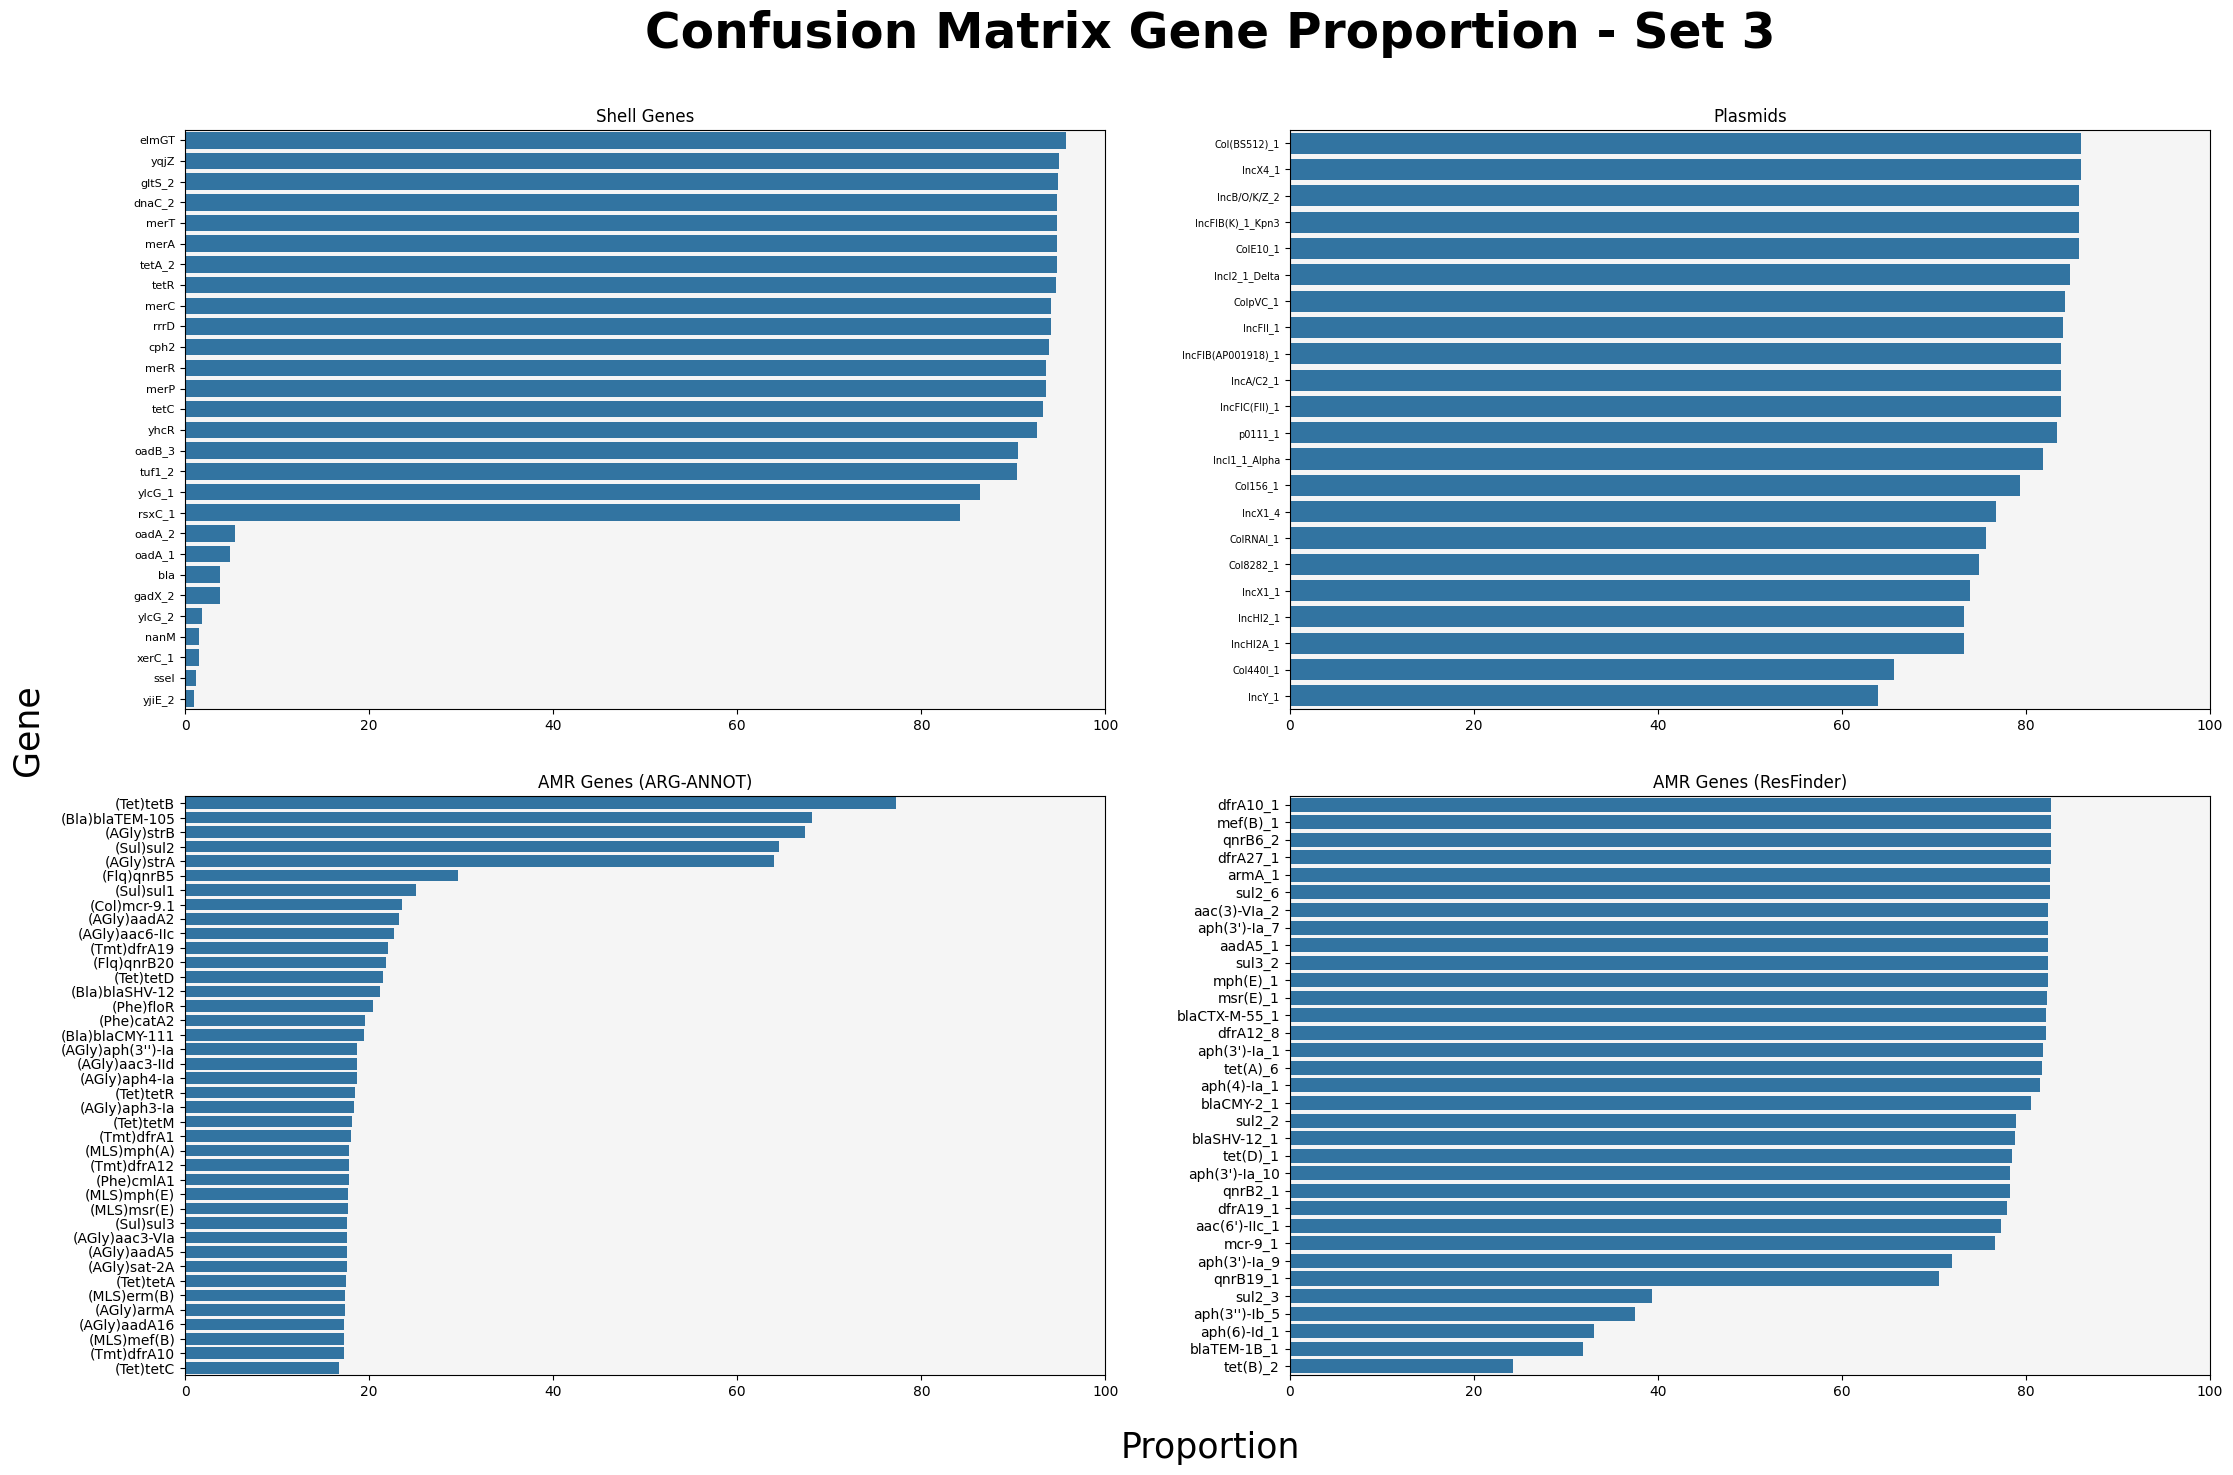

In [37]:
fig, axs = plt.subplots(2, 2, figsize = (25, 15))

# Adjust spacing between subplots
plt.subplots_adjust(left = 0.09, right = 0.9, 
                    bottom =0.07, top = 0.9, 
                    wspace = 0.2, hspace = 0.15)

# Shell Genes
sg_plot = sns.barplot(cm_sg, x = 'Prop', y = 'Gene',
                      ax = axs[0, 0])

sg_plot.set_title('Shell Genes')
sg_plot.set(xlabel = None, ylabel = None)
sg_plot.set_facecolor('whitesmoke')

sg_lab = sg_plot.get_yticklabels()
sg_plot.set_yticklabels(sg_lab , fontsize = 8)

# Plasmids
pls_plot = sns.barplot(cm_pls, x = 'Prop', y = 'Gene',
                       ax = axs[0, 1])

pls_plot.set_title('Plasmids')
pls_plot.set(xlabel = None, ylabel = None)
pls_plot.set_facecolor('whitesmoke')

pls_lab = pls_plot.get_yticklabels()
pls_plot.set_yticklabels(pls_lab , fontsize = 7)

# Argannot
arg_plot = sns.barplot(cm_arg, x = 'Prop', y = 'Gene',
                       ax = axs[1, 0])

arg_plot.set_title('AMR Genes (ARG-ANNOT)')
arg_plot.set(xlabel = None, ylabel = None)
arg_plot.set_facecolor('whitesmoke')

arg_lab = arg_plot.get_yticklabels()
# arg_plot.set_yticklabels(arg_lab , fontsize = 8)

# Resfinder
res_plot = sns.barplot(cm_res, x = 'Prop', y = 'Gene',
                       ax = axs[1, 1])

res_plot.set_title('AMR Genes (ResFinder)')
res_plot.set(xlabel = None, ylabel = None)
res_plot.set_facecolor('whitesmoke')

res_lab = res_plot.get_yticklabels()
# res_plot.set_yticklabels(res_lab , fontsize = 8)

plt.suptitle('Confusion Matrix Gene Proportion - Set 3', fontsize = '35', fontweight = 'bold')
fig.supxlabel('Proportion', fontsize = '25')
fig.supylabel('Gene', fontsize = '25')
plt.setp(axs, xlim = (0, 100))

plt.show()